In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from scipy.integrate import odeint
import seaborn as sns

In [2]:
global mu10,mu20,mu1,mu2,gamma,D,eta,kappa

In [3]:
def TwoSpecies(Y,t):
    s1=Y[0]
    s2=Y[1]
    p1=Y[2]
    p2=Y[3]
    lambda1=mu1/mu10-1
    lambda2=mu2/mu20-1

    dY=[mu1/s1*(s1+lambda2*p1)*s1*(1-s1-gamma[1]*s2)-D*s1,
        mu2/s2*(s2+lambda1*p2)*s2*(1-gamma[0]*s1-s2)-D*s2,
        mu1*(1+lambda2)*p1*(1-s1-gamma[1]*s2)+eta*(s2+p1)*(s1-p1)-kappa*p1-D*p1,
        mu2*(1+lambda1)*p2*(1-gamma[0]*s1-s2)+eta*(s1+p2)*(s2-p2)-kappa*p2-D*p2]
    return dY

In [4]:
mu10=0.5
mu20=0.5
gammas=[0.8,0.9,0.99]
kappa=0.005
D=0.2
initial=[0.5,0.5,0,0]
timespan=np.arange(0,200.1,0.1)

num=2000
mu1s=np.random.rand(num,1)
mu2s=np.random.rand(num,1)

etas=np.arange(0,0.6,0.1)

S1=np.zeros((len(gammas),len(etas),num))
S2=np.zeros((len(gammas),len(etas),num))

In [5]:
for i in range(len(gammas)):
    gamma=[0.5*gammas[i],gammas[i]]
    print(gamma)
    for j in range(len(etas)):
        j
        eta=etas[j]
        for k in range(num):
            mu1=mu1s[k,0]
            mu2=mu2s[k,0]
            Y=odeint(TwoSpecies,initial,timespan)
            S1[i,j,k]=Y[-1,0]
            S2[i,j,k]=Y[-1,1]

[0.4, 0.8]
[0.45, 0.9]
[0.495, 0.99]


In [6]:
thresh=0.01
prob=np.zeros((len(gammas),len(etas)))
for i in range(len(gammas)):
    for j in range(len(etas)):
        pin=0
        for k in range(num):
            if min(S1[i,j,k],S2[i,j,k])>thresh:
                pin=pin+1
        prob[i,j]=pin/num



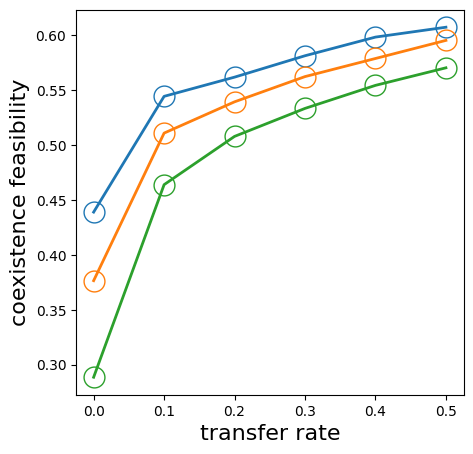

In [7]:
CC=sns.color_palette('tab10')
plt.figure(figsize=(5,5))
for i in range(len(gammas)):
        plt.plot(etas,prob[i,:],'o-',markersize=15,linewidth=2,color=CC[i],fillstyle='none')
plt.xlabel('transfer rate',fontsize=16)
plt.ylabel('coexistence feasibility',fontsize=16)
plt.savefig('CoexistenceProbNonsymmetricCompetition.pdf')
plt.show()

In [8]:
import pandas as pd
df=pd.DataFrame(prob)
df.to_csv("CoexistenceProbNonsymmetricCompetition.csv")